## Jada Macharie
## Assignment 8

In [1]:
import plotly.express as px
import geopandas as gpd
import plotly.io as pio
import pandas as pd
import json
import os

In [2]:
os.getcwd()
os.chdir('/Users/jadamacharie/Downloads')
os.getcwd()

'/Users/jadamacharie/Downloads'

In [3]:
with open("fipsToState.json", 'r') as f:
    states_data = json.load(f)   
    
UScounties = gpd.read_file("gz_2010_us_050_00_20m.json", driver ="GeoJson")
UScounties

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...
3216,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [4]:
df = pd.read_csv('/Users/jadamacharie/Downloads/us-state-ansi-fips.csv')
df
df_states = df.drop(index =[0])
df_states
df_states.rename(columns={"us-state-ansi-fips": "STATENAME", "Unnamed: 1": "STATE", "Unnamed: 2": "STSUSPS"})

,STATENAME,STATE,STSUSPS
1,Alabama,01,AL
2,Alaska,02,AK
3,Arizona,04,AZ
4,Arkansas,05,AR
5,California,06,CA
6,Colorado,08,CO
7,Connecticut,09,CT
8,Delaware,10,DE
9,District of Columbia,11,DC
10,Florida,12,FL


## Most Common County Names

In [5]:
#Top 3 most common county names
n = 3
Three = UScounties['NAME'].value_counts()[:n].index.tolist()
print('Top 3 most common county names are ',Three)

#Top 5 most common county names
x = 5
Five = UScounties['NAME'].value_counts()[:x].index.tolist()
print('Top 5 most common county names are ',Five)

#Top 20 most common county names
k = 20
Twenty = UScounties['NAME'].value_counts()[:k].index.tolist()
print('Top 20 most common county names are ',Twenty)

Top 3 most common county names are  ['Washington', 'Franklin', 'Jefferson']
Top 5 most common county names are  ['Washington', 'Franklin', 'Jefferson', 'Jackson', 'Lincoln']
Top 20 most common county names are  ['Washington', 'Franklin', 'Jefferson', 'Jackson', 'Lincoln', 'Madison', 'Clay', 'Union', 'Montgomery', 'Marion', 'Monroe', 'Wayne', 'Grant', 'Greene', 'Warren', 'Carroll', 'Polk', 'Johnson', 'Lee', 'Adams']


In [6]:
# Highest = UScounties['NAME'].mode()[0]
# Highest
UScounties['NAME'].value_counts().nlargest(10)

Washington    31
Franklin      26
Jefferson     26
Jackson       24
Lincoln       24
Madison       20
Clay          18
Union         18
Montgomery    18
Marion        17
Name: NAME, dtype: int64

## Derive summary statistics for states, for example, number of counties, counties with max/min area

In [85]:
# countymaxarea = UScounties.max()
# print('County with the largest area\n',countymaxarea)

# countyminarea = UScounties.min()
# print('County with the smallest area\n',countyminarea)

UScounties['NAME'].value_counts()


Washington    31
Franklin      26
Jefferson     26
Jackson       24
Lincoln       24
              ..
Wyandot        1
Cape May       1
Bergen         1
Grafton        1
Bland          1
Name: NAME, Length: 1909, dtype: int64

## Merge fips code to get full names of states

In [89]:
NewCounties = pd.concat([UScounties, df_states])
df_NewCounties = NewCounties[['STATE','NAME','CENSUSAREA']]
df_NewCounties

/Users/jadamacharie/anaconda3/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,STATE,NAME,CENSUSAREA
0,01,Autauga,594.436
1,01,Blount,644.776
2,01,Chambers,596.531
3,01,Chilton,692.854
4,01,Colbert,592.619
...,...,...,...
47,NaN,NaN,NaN
48,NaN,NaN,NaN
49,NaN,NaN,NaN
50,NaN,NaN,NaN


In [74]:
#inner_merged_total = pd.merge(UScounties, df_states, on=["STATE"])

## Plot maps to show all the counties with the most common names from first task

<Axes: >

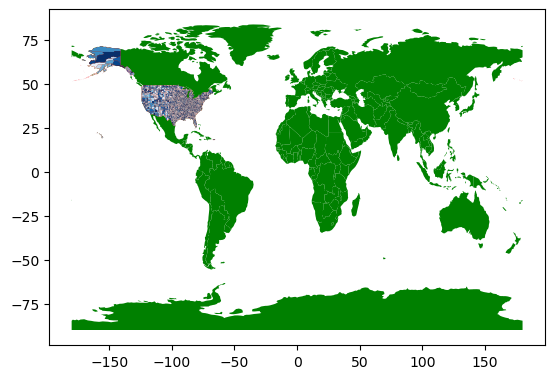

In [52]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
k= world.plot(color = 'green')
k
x= UScounties.plot(ax=k,color='red')
x
j= UScounties.plot("NAME",ax=x, cmap="Blues")  
j

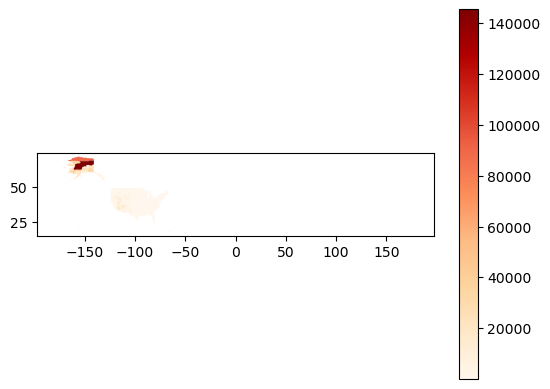

In [71]:
UScounties.plot(column='CENSUSAREA',legend=True, cmap='OrRd');

<Axes: >

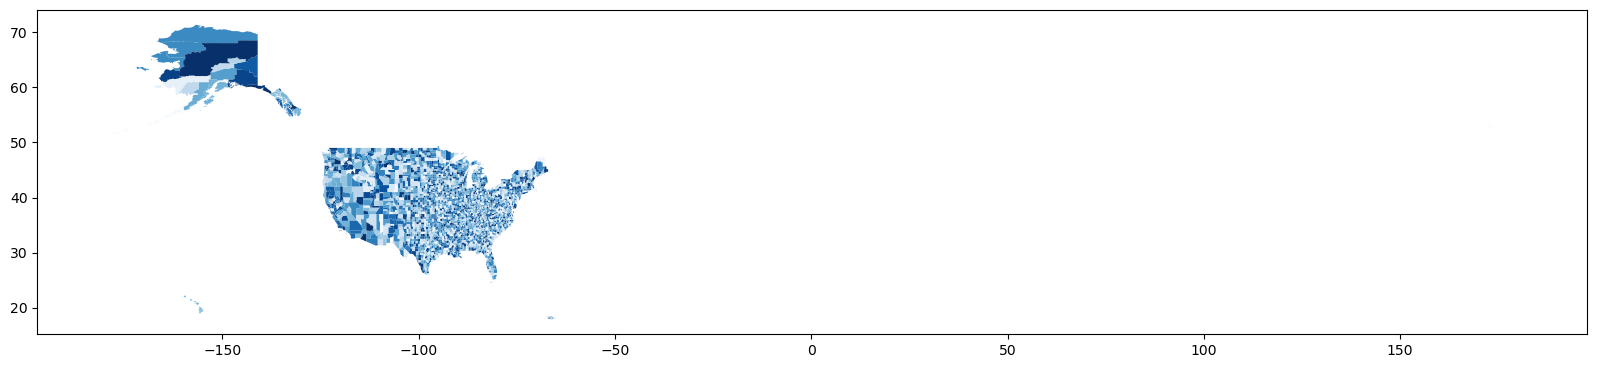

In [70]:
UScounties.plot("NAME",cmap="Blues", figsize= (20,20)) 


<Axes: >

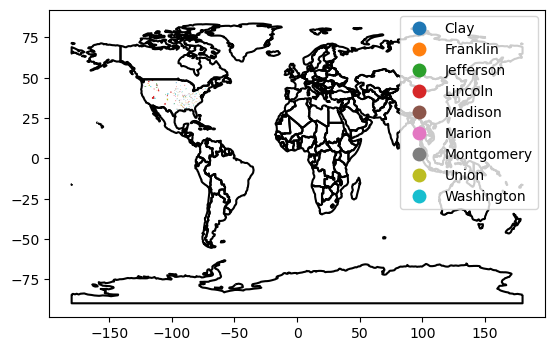

In [68]:
ax = world.boundary.plot(color='k')

list_of_top10_names = ['Washington', 'Franklin', 'Jefferson','Lincoln','Madison','Clay','Union','Montgomery','Marion']

Commonnames = UScounties[UScounties['NAME'].isin(list_of_top10_names)]
Commonnames

Commonnames.plot(ax=ax,column= 'NAME', legend=True,figsize =(30,30))
